<a href="https://colab.research.google.com/github/szabilukacs/Quiz-application/blob/main/linreg_ipynb_m%C3%A1solata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lineáris regresszió Python-ban



----


Regressziószámítással során véletlen változók között fennálló kapcsolatot modellezzük. A [lineáris regresszió](https://hu.wikipedia.org/wiki/Line%C3%A1ris_regresszi%C3%B) esetében feltételezzük, hogy a magyarázó- ($X$) és a magyarázott ($Y$) változók közti összefüggés lineáris:
$$y_i = c_0 + c_1x_{i1} + c_2x_{i2} + \dots + c_kx_{ik} + \epsilon_i$$

ahol $\epsilon_i$ egy meg nem figyelt véletlen változó, amely "zajjal" perturbálja a magyarázó és a magyarázott változók közötti lineáris kapcsolatot.


A lineáris regresszió becslése során, valamilyen optimumkeresési eljárás segítségével (pl. a [legkisebb négyzetek módszere](https://hu.wikipedia.org/wiki/Legkisebb_n%C3%A9gyzetek_m%C3%B3dszere)), megkeressük a $c_i$ paramétervektorokat, melyekkel minimalizálják a hibát a rendelkezésre álló mintákhoz képest.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/Linear_least_squares_example2.png/952px-Linear_least_squares_example2.png)

Ábra 1. A lineáris regresszió alkalmazásánál, feltételezzük, hogy a rendelkezésre álló minták, megfigyelések (piros pontok), egy függő ($y$) és egy független változó ($x$) közötti lineáris viszonytól (kék vonal) való véletlenszerű kisebb eltérésekből (zöld vonalak) származnak. [Kép forrása](https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/Linear_least_squares_example2.png/952px-Linear_least_squares_example2.png)

Python-ban, a lineáris regresszió számítására a `scikit-learn` csomag [`sklearn.linear_model.LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) modelljét [alkalmazhatjuk](https://realpython.com/linear-regression-in-python/).

## Példa

 

Automatically created module for IPython interactive environment
Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


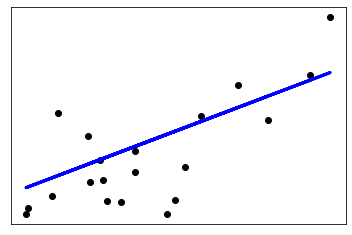

In [ ]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# Feladatok

1.	Illesszünk lineáris regresszió függvényt `sklearn.linear_model.LinearRegression` segítségével, a következő adatokra: 
```python
rng = np.random.RandomState(42) 
x = 10 * rng.rand(100) 
y = 2 * x - 5 + rng.randn(100) 
plt.scatter(x, y);
```

2.	Írassuk ki a regressziós egyenes hibáját (R négyzet érték) és a regressziós vonal lejtő-elfogását (*intercept*) és meredekségét (*slope*). 

3.	A `house_sales.csv` állomány házeladási tranzakciókat tartalmaz, feltüntetve a ház paramétereit (szobák, emeletek száma, terület, állapot, kilátás stb.) és az eladási árat. Vizualizáljuk a paraméterek eloszlását majd építsünk egy lineáris regresszió modellt, mely különböző paraméterekre, megbecsüli egy háznak az árát. Vizsgáljuk meg a modell pontosságát. 

4.	Teszteljük vizuálisan (ha valamilyen mintázat látszik a ploton, akkor valamilyen nemlineáris hatás is jelen van) a linearitást  a reziduálisok és regressziós paraméterek pontdiagramon való ábrázolásával. (A reziduális annak mértéke, hogy egy pont milyen távolságra van függőlegesen a regressziós egyenestől. Egyszerűen az előre jelzett érték és a megfigyelt tényleges érték közötti eltérést/hibát jelenti.)

5.	Ábrázoljuk a reziduálisok eloszlását hisztogram és [Q–Q plot](https://towardsdatascience.com/q-q-plots-explained-5aa8495426c0) segítségével.

In [ ]:
# 1
from google.colab import files
files.upload()

Saving house_sales.csv to house_sales.csv


{'house_sales.csv': b'"id","date","price","bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","zipcode","lat","long","sqft_living15","sqft_lot15"\n7129300520,"20141013T000000",221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650\n6414100192,"20141209T000000",538000,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639\n5631500400,"20150225T000000",180000,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062\n2487200875,"20141209T000000",604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000\n1954400510,"20150218T000000",510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503\n7237550310,"20140512T000000",1.225E+06,4,4.5,5420,101930,1,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930\n1321400060,"20140627T000000",257500,3,2.25,1715,6819,2,0,0,3,7,1715,0,1995,0,98003,4

[[1.95402268]]
[-4.78490384]
[[1.95402268]]


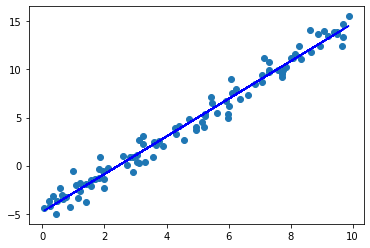

In [ ]:
from sklearn.linear_model import LinearRegression

rng = np.random.RandomState(42) 
x = 10 * rng.rand(100) 
y = 2 * x - 5 + rng.randn(100) 
plt.scatter(x, y);

#1
reg = LinearRegression()
y = y.reshape(-1, 1)
x = x.reshape(-1, 1)
r = reg.fit(x, y)
print(reg.coef_)
yp = reg.predict(x)
plt.plot(x, yp, color="blue")

r2_score(y, yp)

#2
print(reg.intercept_)
print(reg.coef_)


In [ ]:
#3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('house_sales.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


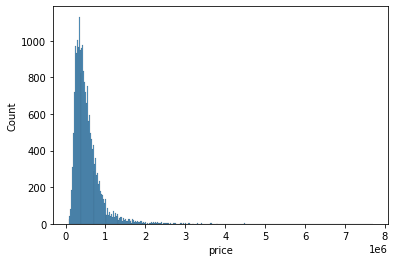

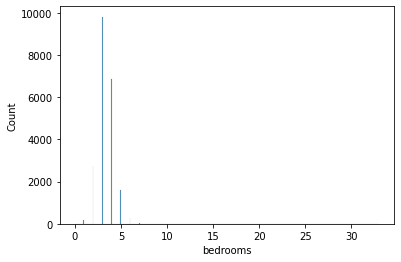

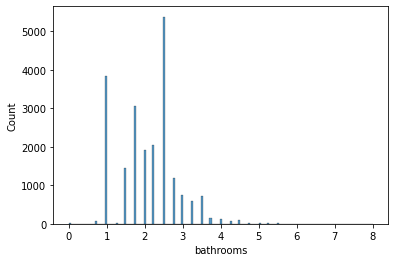

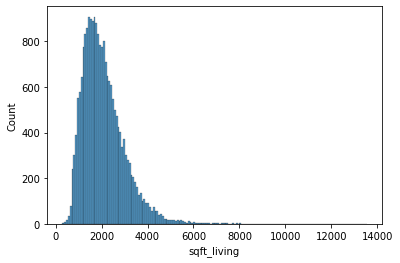

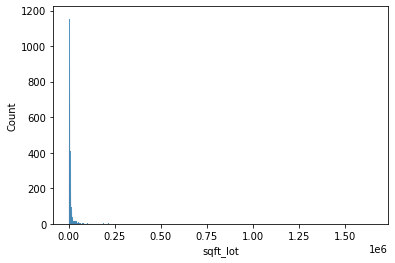

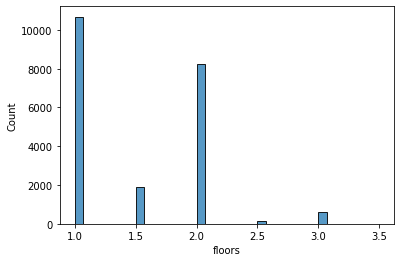

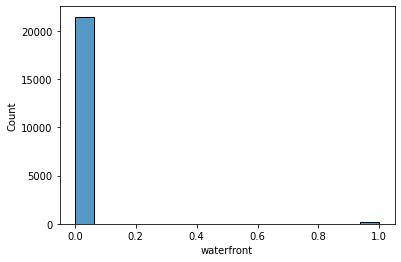

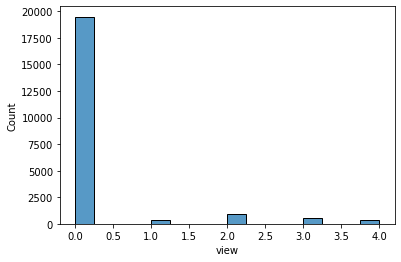

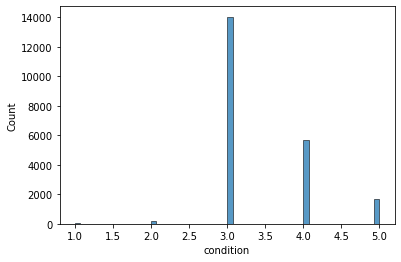

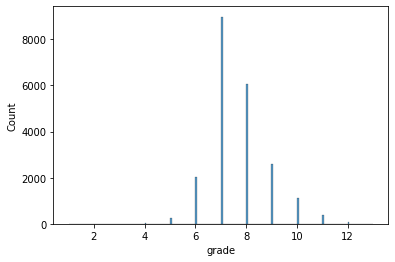

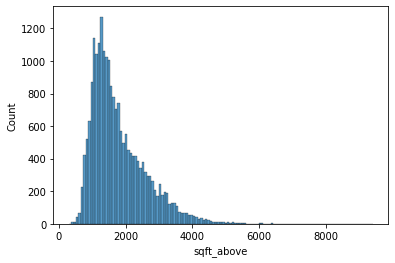

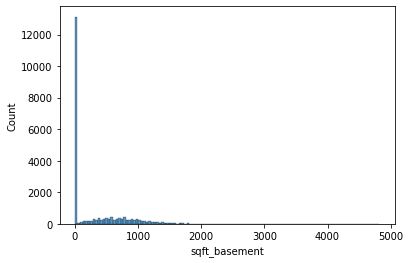

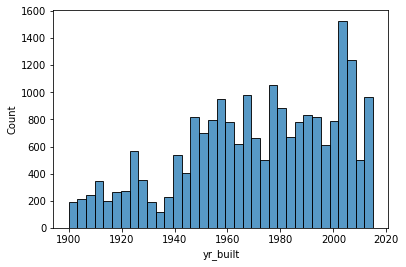

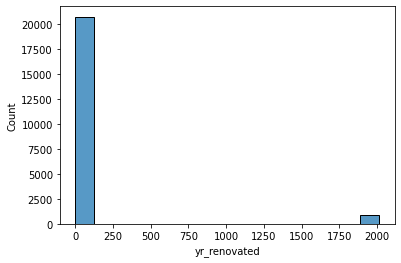

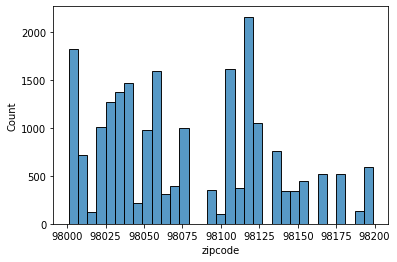

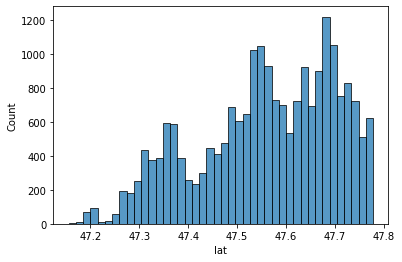

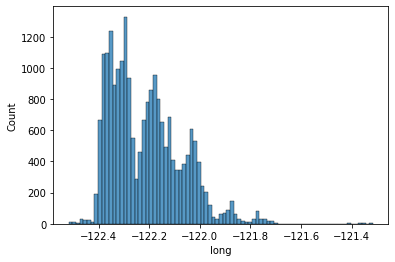

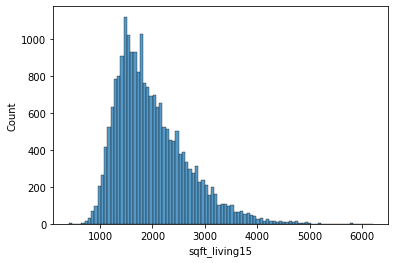

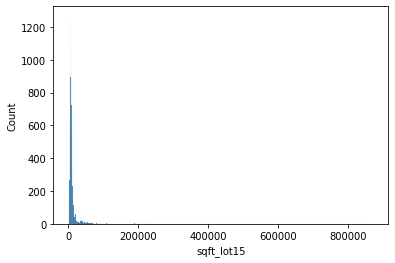

In [ ]:
df_sum=df.cumsum()
cols_to_ignore = ['id', 'date']
for column in df.columns:
    if column in cols_to_ignore:
      continue
    plt.figure()
    sns.histplot(df[column])

    

0.5069198616689737

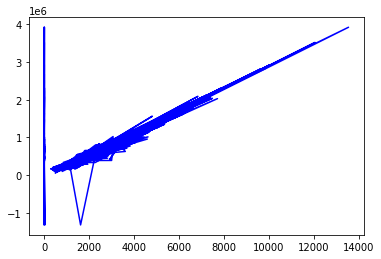

In [ ]:
x = df[['bedrooms', 'bathrooms', 'sqft_living', 'floors']]
y = df['price']

regression = LinearRegression()
r = regression.fit(x, y)
yp = regression.predict(x)
plt.plot(x, yp, color="blue")

r2_score(y, yp)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


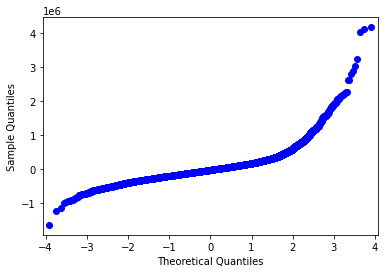

In [ ]:
#5
import statsmodels.api as sm

res = residual = (y - yp)

fig = sm.qqplot(res)
plt.show()